In [384]:
# in classification, significance is determined using entropy value.
# dt = tree.DecisionTreeClassifier(random_state=100) ; random state = 100 is making the results of model consistent.you can use any number but it shoudl be 
# same throughout the code then.

In [385]:
# Classifications can be used to find the recommendations related to an item.

In [386]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [387]:
df = pd.read_csv('CreditCardData.csv')

In [388]:
df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [389]:
# Question 1: clean the data
df1 = df[df != "?"].dropna()

In [390]:
df1.count()
# We have dropped all the rows with NULL values. 

Male              653
Age               653
Debt              653
Married           653
BankCustomer      653
EducationLevel    653
Ethnicity         653
YearsEmployed     653
PriorDefault      653
Employed          653
CreditScore       653
DriversLicense    653
Citizen           653
ZipCode           653
Income            653
Approved          653
dtype: int64

In [391]:
df1.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [392]:
# Replaced the Approved column (response variable) values from -/+ to 0/1
df2= df1
df2['Approved'] = df2['Approved'].replace('+', '1')
df2['Approved'] = df2['Approved'].replace('-', '0')

In [393]:
df2

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,0


In [394]:
# Answer 3: Create a train and test set after cleaning the data. Use 30% (0.3) records for test set  
# Use the same train and test set for all your analysis with different classifiers.
# Answer 4: Setting the seed

df2["Age"] = df2["Age"].astype(float)
df2["ZipCode"] = df2["ZipCode"].astype(int)

X = df2.drop(['Approved'], axis = 1)
Y = df2['Approved']

object_type_col = X.select_dtypes(exclude=['int', 'float']).columns.tolist()

X = pd.get_dummies(X, columns = object_type_col ).astype(int)


I initially converted the 'Age' and 'ZipCode' to int. Then I divided my data set into input X and output Y. After that, I used one hot encoding to convert my categorical cols into numerical cols.

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

We have fixed our set for all analysis by setting random_state = 99. This would help us in conssitent results. We have now divided 70% of our data for training and 30% for testing. 

In [396]:
# Answer 5: a classification model to predict Approved status using Decision Tree.

dt = tree.DecisionTreeClassifier(random_state=99) # created decision tree
dtmodel = dt.fit(X_train, y_train) # modelling decision tree to training data set. Helps model to learn the relationshop b/w X and Y

In [397]:
train_pred = dtmodel.predict(X_train) # testing the data on X_train.
acc = accuracy_score(train_pred, y_train) # testing the accuracy of data model on trained data
acc*100

# it gives us the overfitting values. as we can see perfect results.

100.0

In [398]:
test_pred = dt.predict(X_test) # testing model on our testing data

In [399]:
acc = accuracy_score(test_pred, y_test) 
acc*100

# on comparission we can see that our model has 85.2% corretly predicted our values for testing data.
# # overfitting is when our model is trained with limited data points. Then it gives correct details for that set of data only.

85.20408163265306

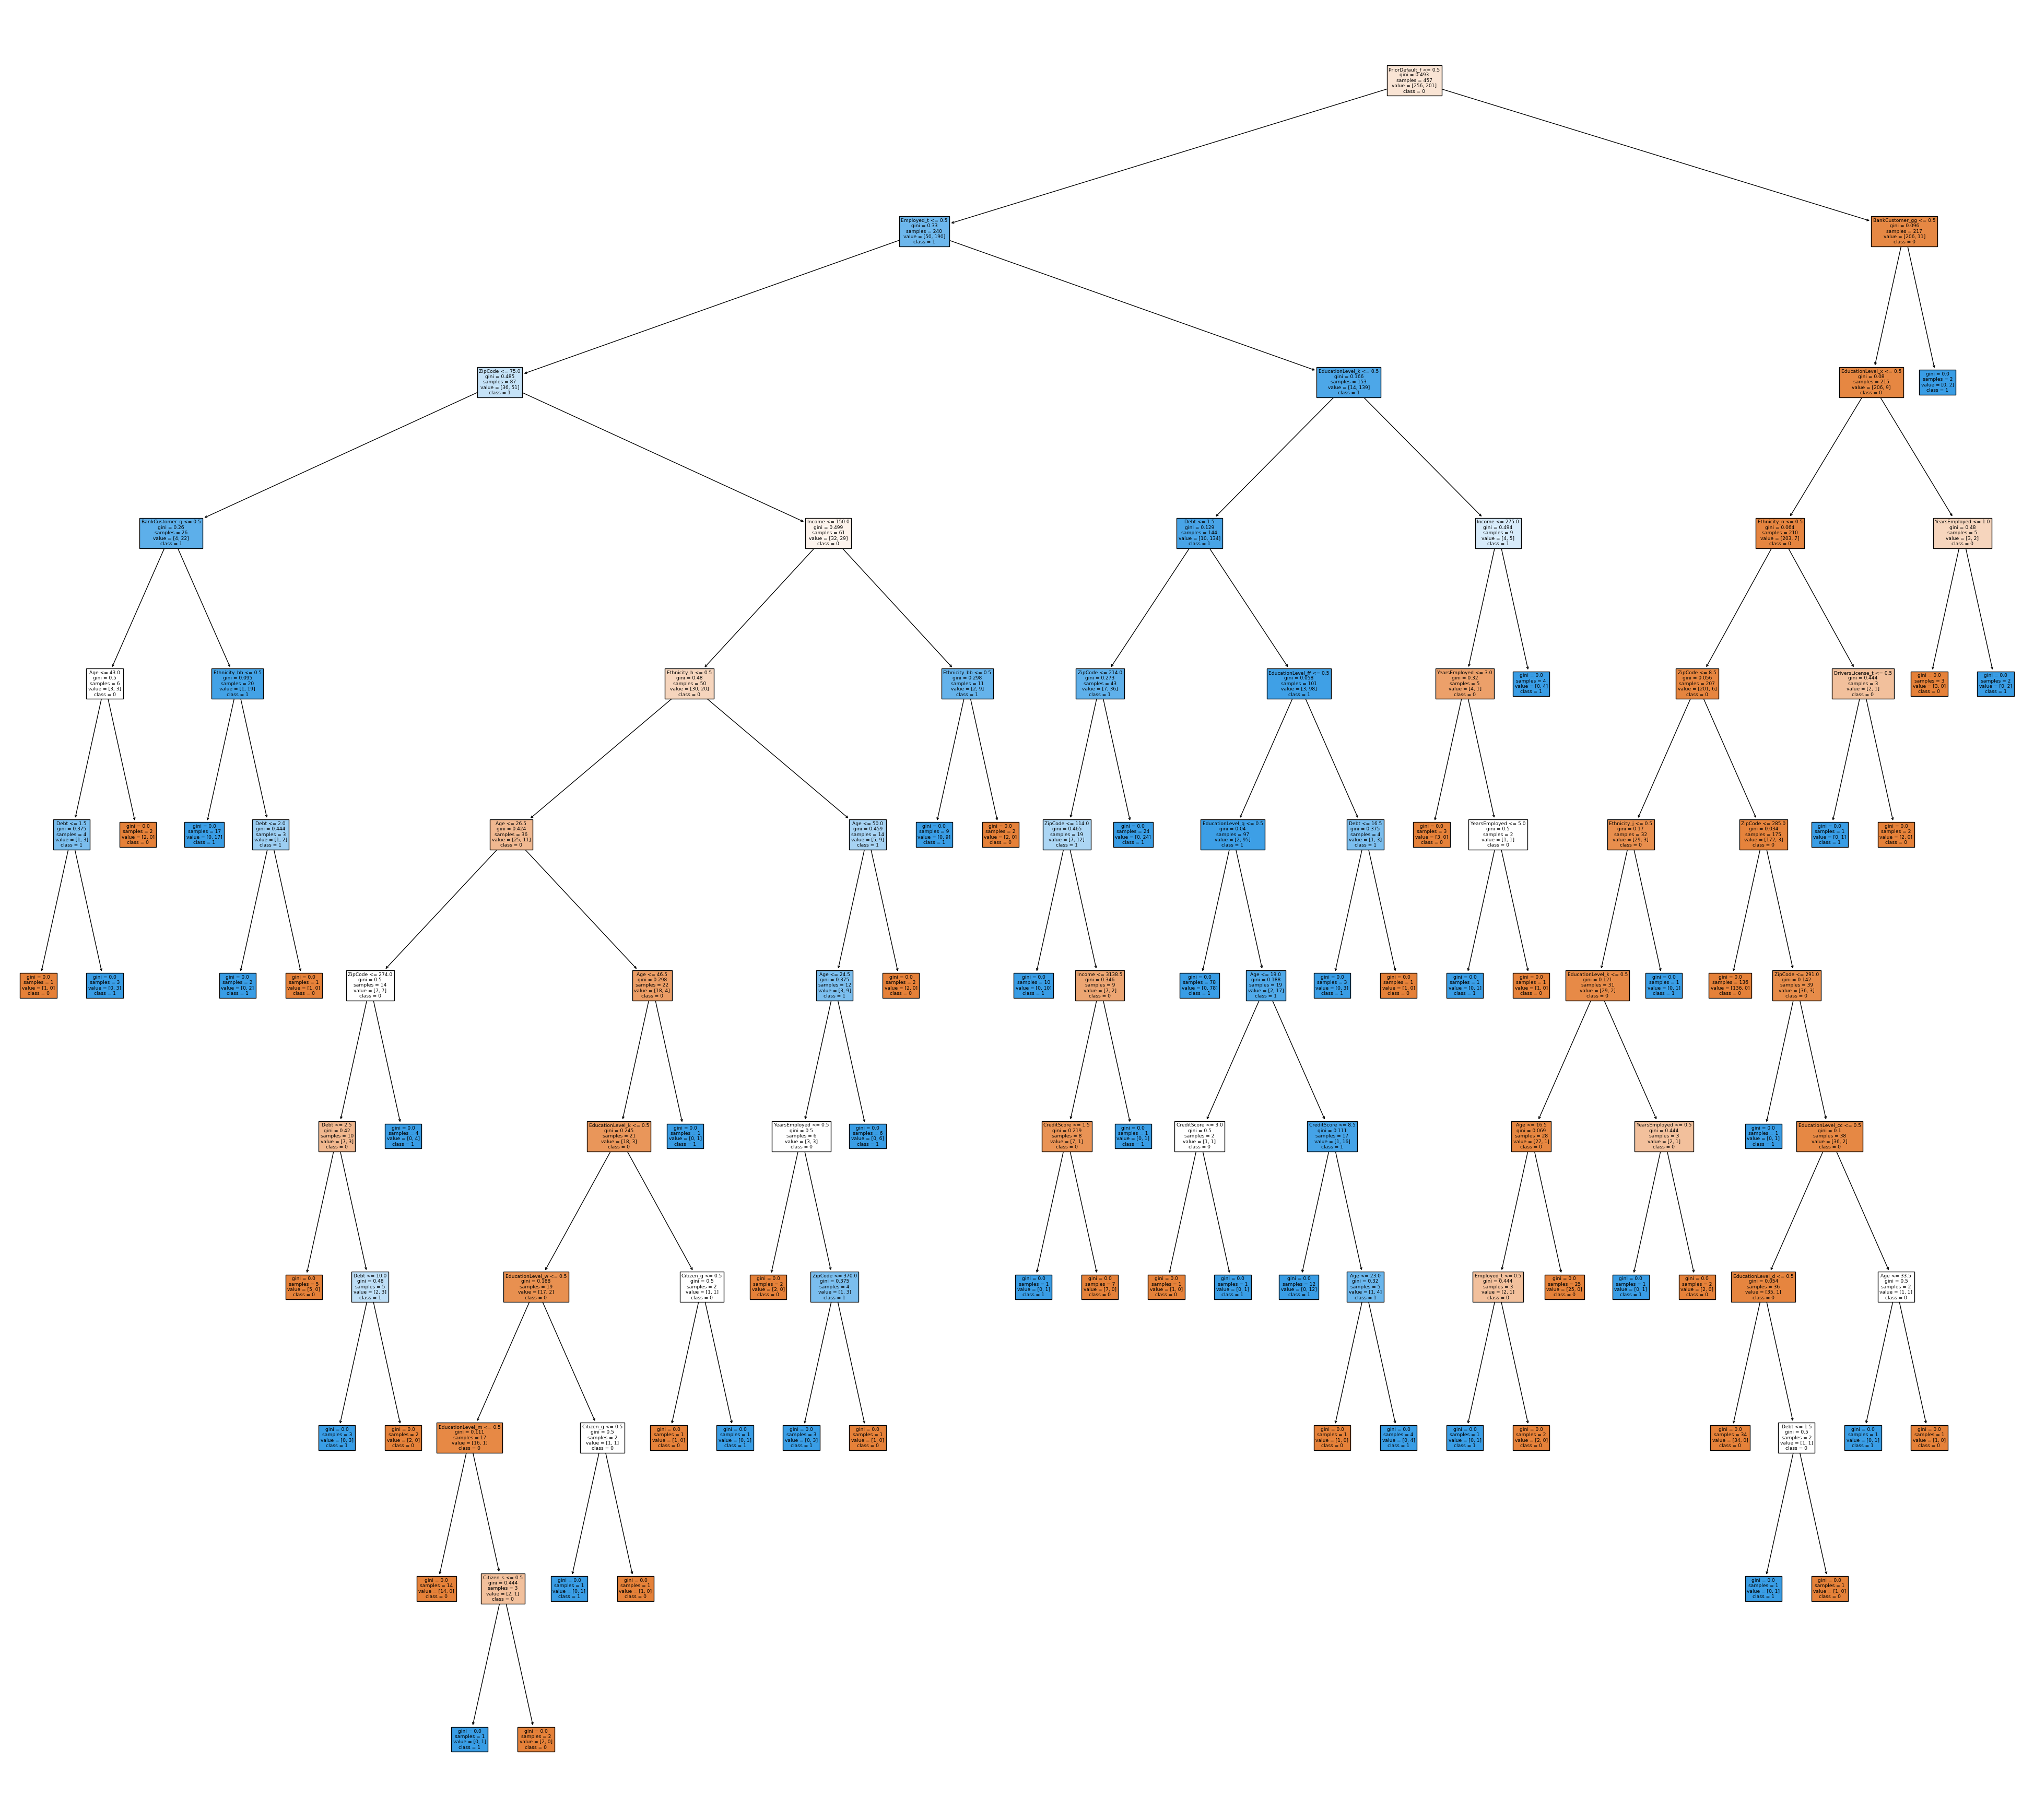

In [400]:
fig = plt.figure(figsize=(50,45)) # Visualize the decision tree
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names= list(Y.value_counts().index),
                   filled=True)

Interpretation: The top feature is PriorDefault. It means it is the most important feature to predict our "Approval" data set. The last entity the Citizen_s column which means Citizen is one of the least important column to consider while predicting "Approval" from our data set 

In [401]:
# fig.savefig("CredidCard_Approval_decistion_tree.png")

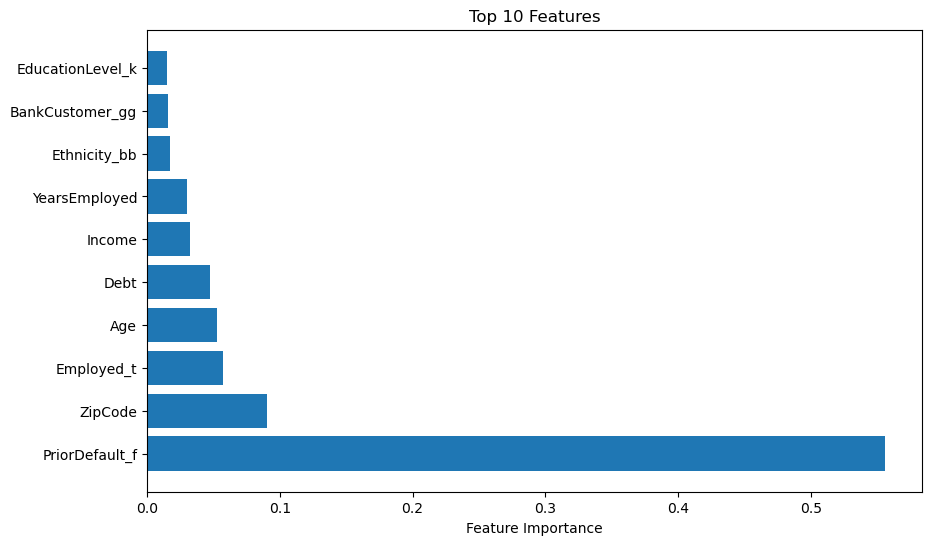

In [402]:
# Discussing which attributes are important and which are not important. 
sorted_idx = dtmodel.feature_importances_.argsort()[::-1]  # Sort indices in descending order

# Select the top 10 features
top_10_features_idx = sorted_idx[:10]
top_10_features = list(X.columns[top_10_features_idx])
top_10_importances = dtmodel.feature_importances_[top_10_features_idx]

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_importances)
plt.xlabel("Feature Importance")
plt.title("Top 10 Features")
plt.show()

We can see by looking at the feature importance chart that Prior_Default is the most important column to predict the "Approved" values in our data set. To be specific, we can see that that entries with Prior_Default = f are most likely to get their approval.
After that Zip code is the most important one to get the approval and then Employed column,Age, Debt, Income and so on...

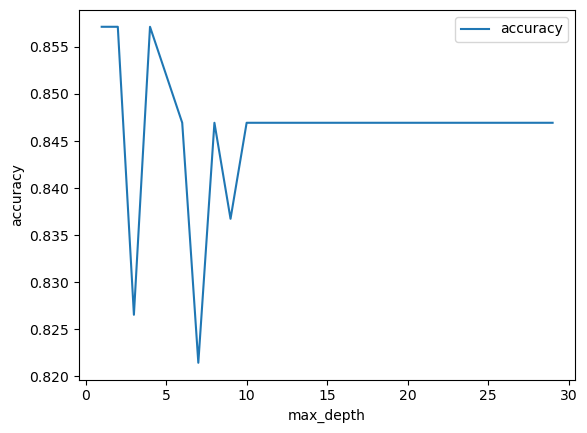

In [403]:
# Answer 6: Performing the Tree Pruning Analysis and evaluate the results

# since our model has failed to generalize its prediction outside trained data set therefore we can use tree pruning analysis to p
# predict our data in a better way.

max_depth = []
acc = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(max_depth=i,random_state=100)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(y_test, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot(d['max_depth'].values,d['accuracy'].values)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(["accuracy"])



In [404]:
# Prunned model
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth= 5 ,random_state=99)
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

92.34135667396062

In [405]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

86.22448979591837

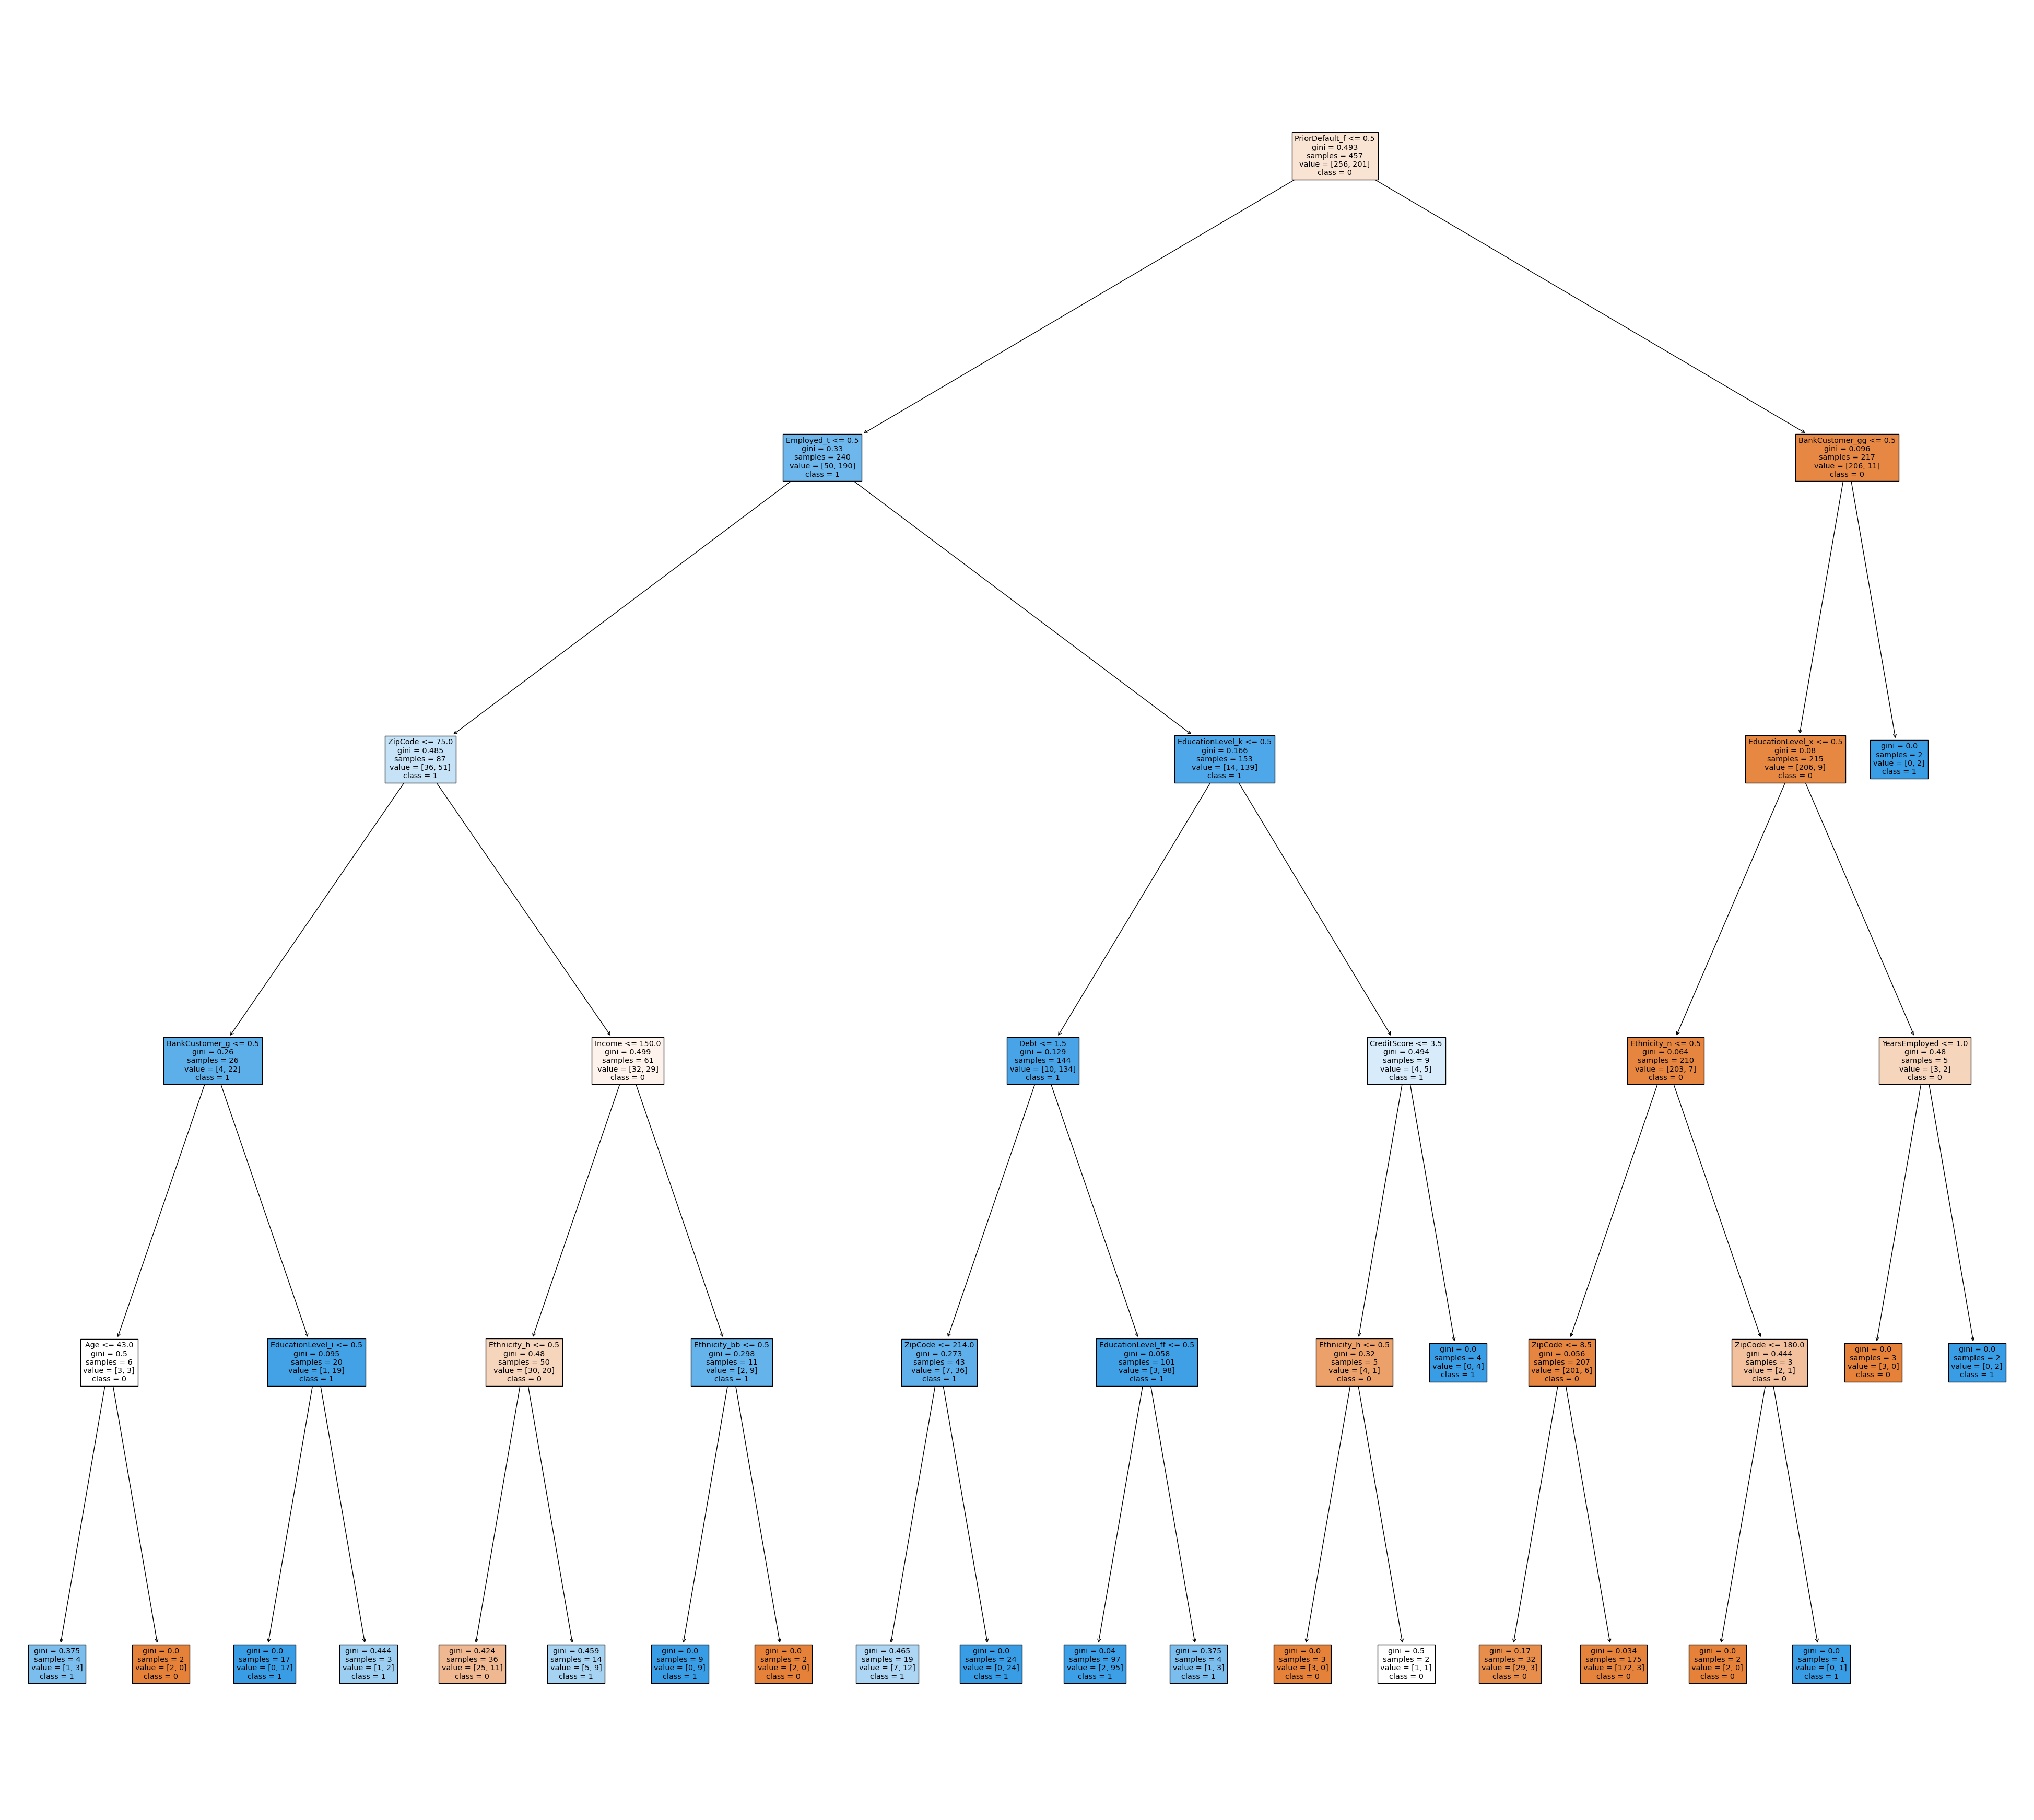

In [406]:
fig = plt.figure(figsize=(50,45)) # Visualize the decision tree
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names= list(Y.value_counts().index),
                   filled=True)

By using prunned model; max depth = 5 and criterion = gini we can see that our prediction model has imporved its accuracy than before. It is also not giving perfect results on trained data which is a good thing becuase we have overcomed the overfitting problem to a certain level. By visualizing the tree we can see that the max depth now is 5 instead of 30. It is more easy to visualize the most important columns now, using the tree. Hence this prediction model is a better choice than the last one. 

In [407]:
# Answer 7: Create a classification model to predict Approved status using RandomForest

In [414]:
# "n estimators" means the number of decision tree.
# you won't see the problem of overfitting in random forest because it uses multiple decision trees in it
# researchers has come to the conclusion that random forest always always works equal or better than decision trees because you know it, 
# it uses multiple decision trees basically, and it avoids the the problem of overfitting as well.

In [415]:
rf = RandomForestClassifier(n_estimators=50)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

87.24489795918367

In [416]:
rf = RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

87.75510204081633

In [417]:
rf = RandomForestClassifier(n_estimators=200)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

87.75510204081633

In [418]:
rf = RandomForestClassifier(n_estimators=300)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

86.22448979591837

In [419]:
rf = RandomForestClassifier(n_estimators=500)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

87.24489795918367

After testing various values for n_estimators, we can see that with increasing values of n_estimatorsthe accuracy of our model is increasing. Therefore we can select the n_estimators=500.

Text(0.5, 0, 'Random Forest Feature Importance')

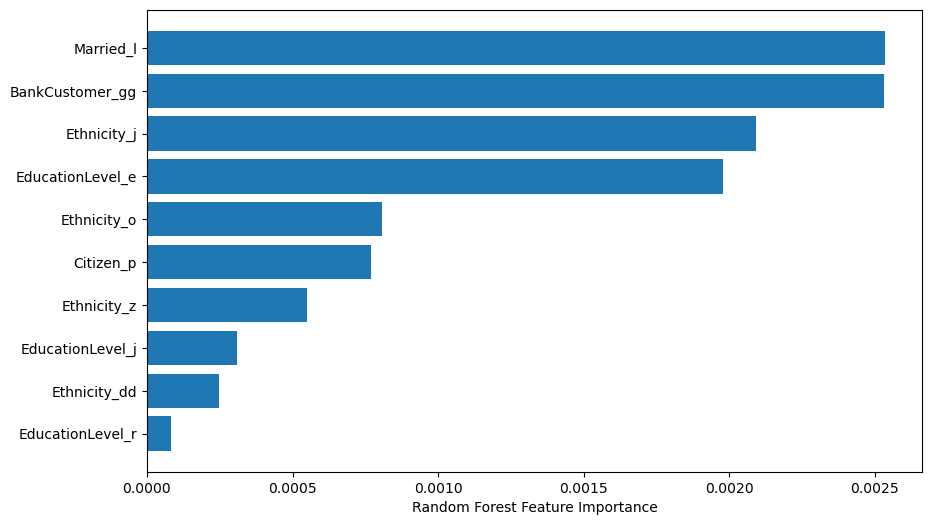

In [421]:
rf = RandomForestClassifier(n_estimators=500)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
test_pred = rfmodel.predict(X_test)

sorted_idx = rfmodel.feature_importances_.argsort()
plt.figure(figsize=(10, 6))
plt.barh(list(X.columns[sorted_idx][:10]), rfmodel.feature_importances_[sorted_idx][:10])
plt.xlabel("Random Forest Feature Importance")

looking at our Random Forest prediction model we can see that the BankCostumer and Married columns are the most important columns to predict the "Approved" value using our data set.

Answer 8: 
We are getting different results for model based on Decision Tree and on Random Forest.

In [423]:
dt_scores = cross_val_score(dtmodel, X, Y, cv=5)
dt_scores.mean()

0.8468349970640048

In [425]:
rf_scores = cross_val_score(rfmodel, X, Y, cv=5)
rf_scores.mean()

0.8452847915443336

By comparing the mean score for both the model we can see that the Random Forest Model can be prefered over Decision Tree Model.
Although both have similar score for accuracy but the scores for Random Forest are a bit higher. This is so because Decision tree require techniques like prunning to cater the problem of overfitting. On the other hand, Random Forest can directly predict results with such level of accuracy. Moreover, we can improve Random Forest tree's accuracy just by increasing the number of trees however we have to set the max-depth of Decision Tree to improve the accuracy of our model. 

# Question 2

In [458]:
m_data = pd.read_csv("mcdonalds.csv")

In [459]:
m_data = m_data.drop("restaurant", axis = 1)

In [460]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)
m_dt = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1,random_state=99) # created decision tree
m_model = m_dt.fit(X, Y) # modelling decision tree to training data set. Helps model to learn the relationshop b/w X and Y.

In [461]:
X = m_data.drop(["item"], axis = 1)
Y = m_data['item']

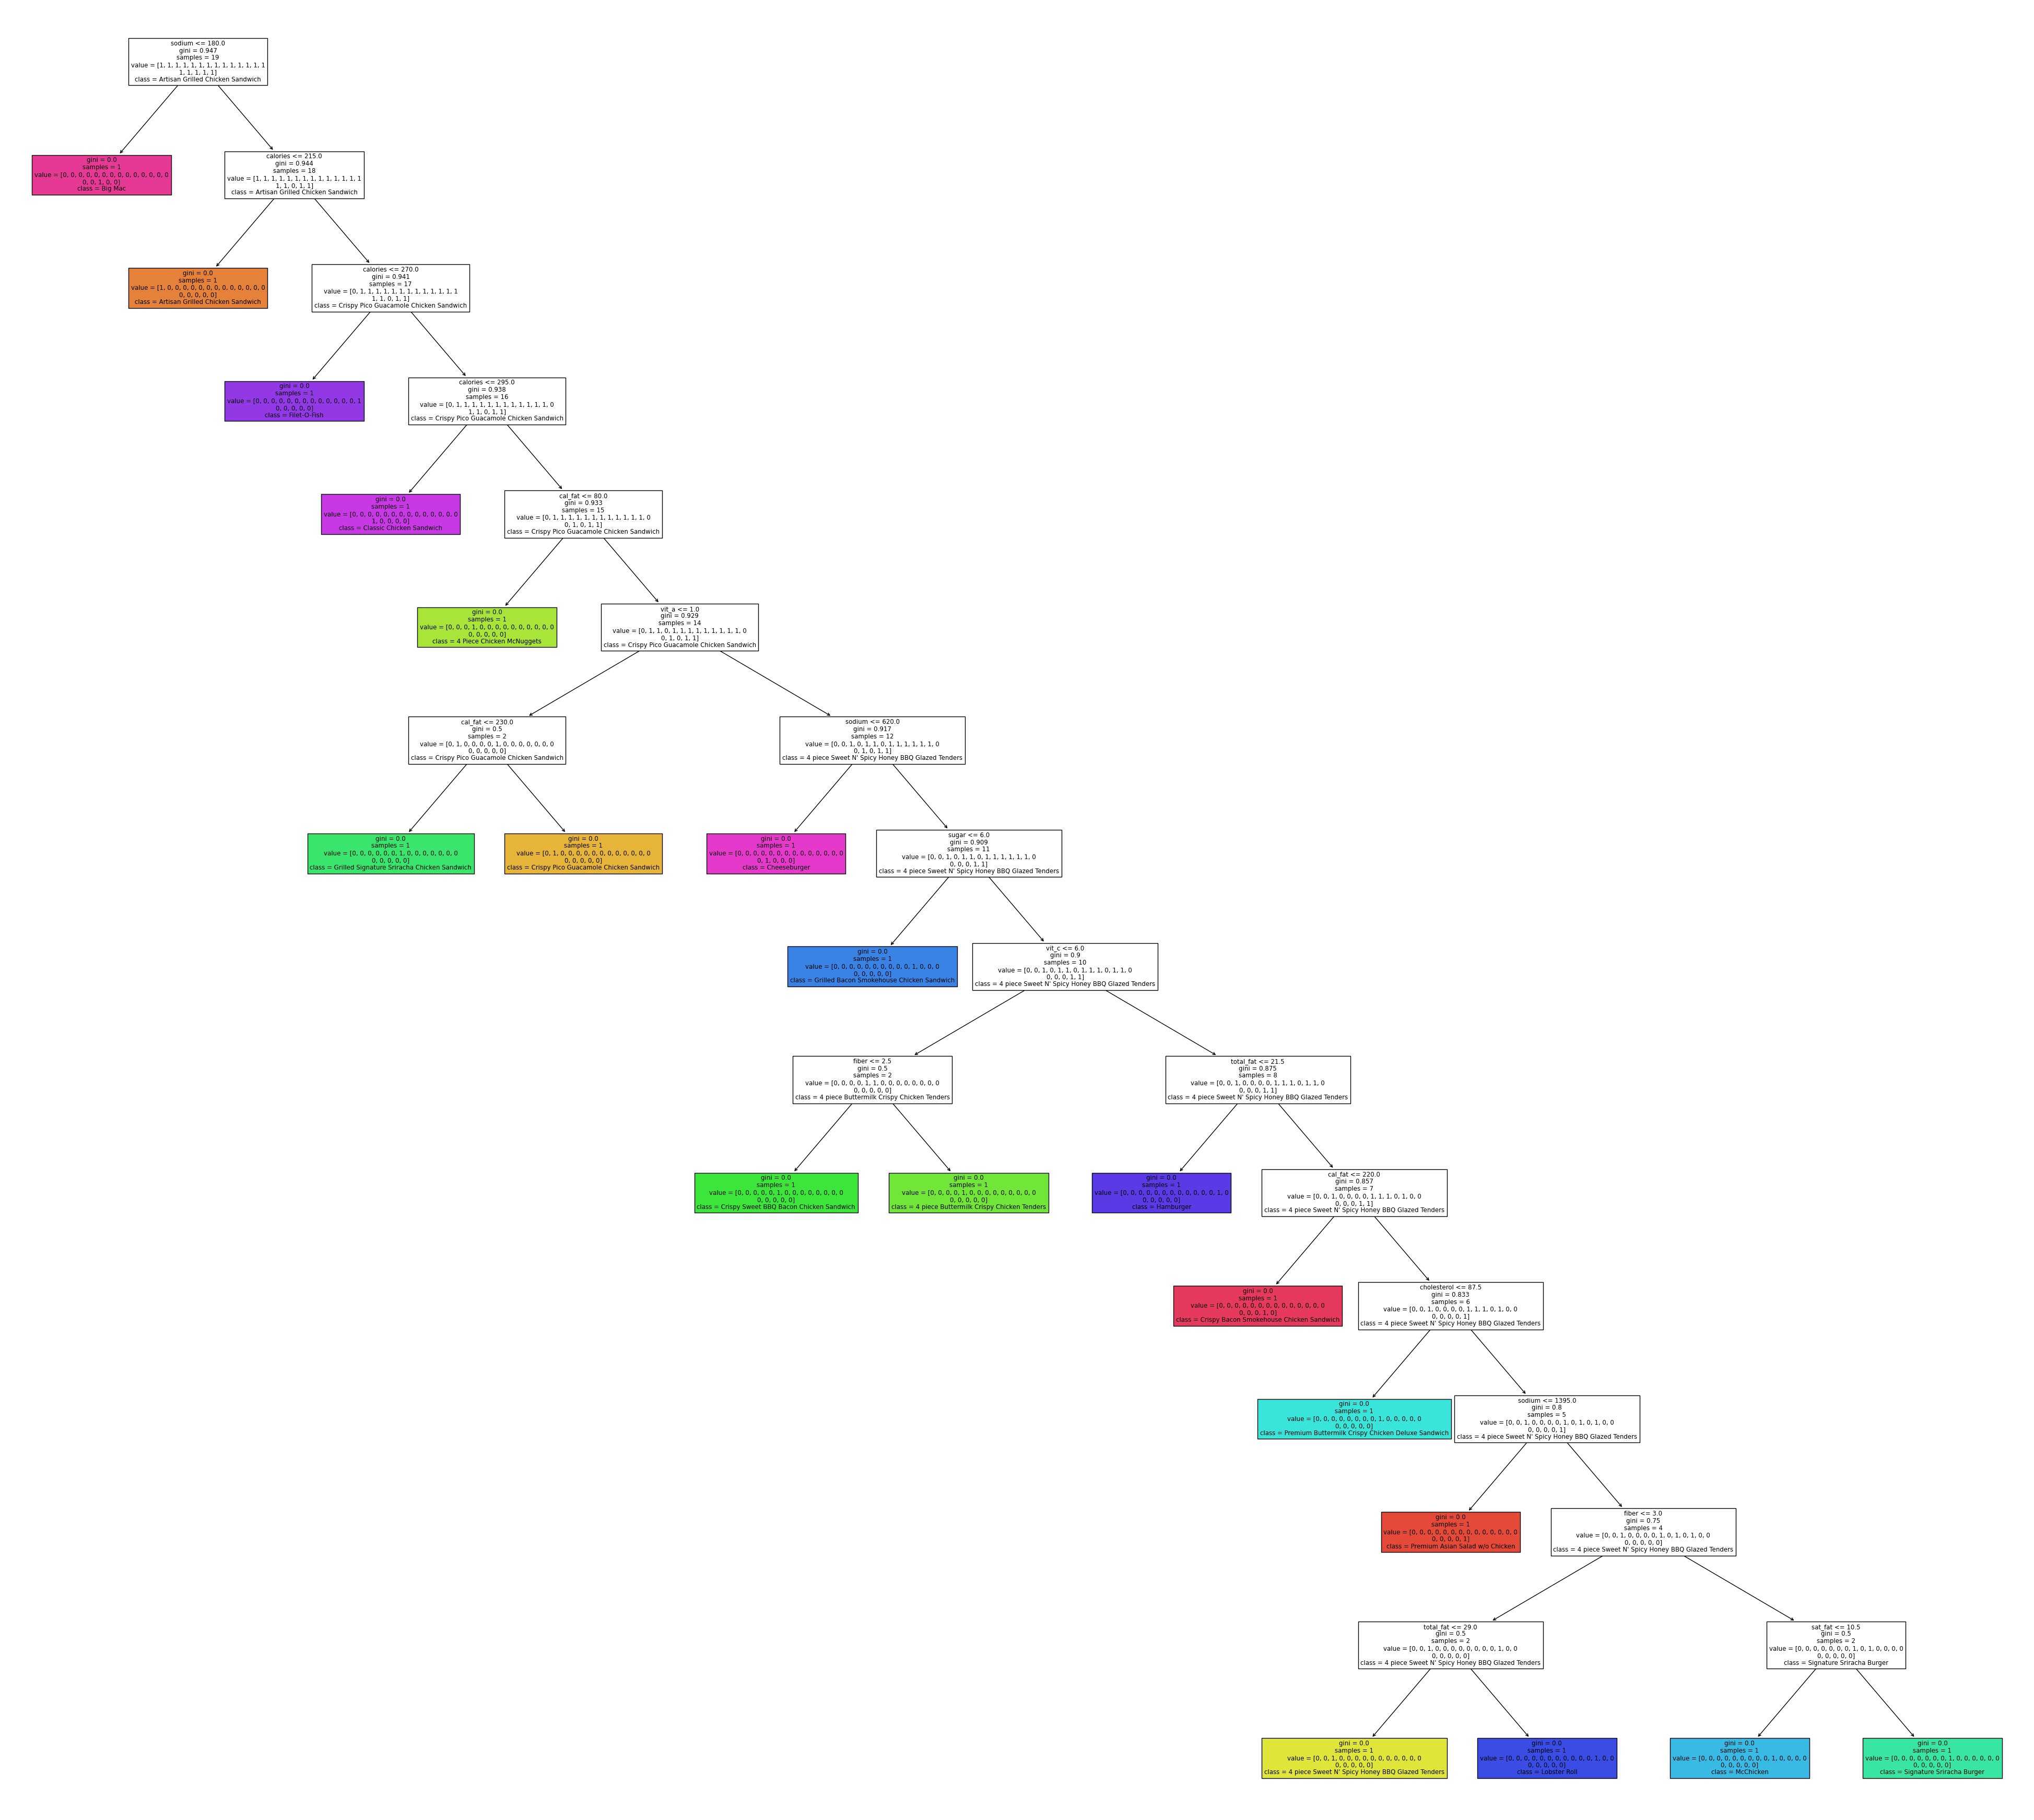

In [462]:
fig = plt.figure(figsize=(50,45)) # Visualize the decision tree
_ = tree.plot_tree(m_model, 
                   feature_names=list(X.columns),  
                   class_names= list(Y.value_counts().index),
                   filled=True)

In [464]:
# fig.savefig("MC_donalds_prediction.png")

We can see the leave nodes of the tree and predict that the nodes in close proximity with each other are more likely to be chosen if the person likes any one of the item among them. These leaf nodes have a Gini Index of 0, therefore:
1) If a person likes McChicken than he is more likely to like Signature Sriracha Burger as well. 
2) If a person likes 4 piece Sweet N' Spicy Honey BBQ Glazed Tenders than he is more likely to like Lobster Roll as well.
3) If a person likes Crispy Sweet BBQ Bacon Chicken Sandwich than he is more likely to like 4 piece Buttermilk Crispy Chicken Tenders as well.